# Visualisations

In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import sys

sys.path.append('../hydra_tod/')

from astropy.coordinates import EarthLocation, AltAz, SkyCoord
from astropy.time import Time, TimeDelta
import astropy.units as u
from utils import Leg_poly_proj, view_samples
from flicker_model import sim_noise, flicker_cov
from simulation import * 

In [2]:
import pickle
with open('tod_simulation_single.pkl', 'rb') as f:
    tod_sim = pickle.load(f)
# Load the simulation data from a pickle file
with open('multi_tod_simulation_data.pkl', 'rb') as f:
    multi_tod_sim = pickle.load(f)

In [3]:
aux_oper = multi_tod_sim.Tsky_operator_setting
aux_oper.shape

(2860, 473)

## Prepare the experimental setup

In [4]:
# Read the saved samples

GS1_Tsys_samples = np.load('outputs/GS1/Tsys_samples.npy')
GS1_gain_samples = np.load('outputs/GS1/gain_samples.npy')
GS1_noise_samples = np.load('outputs/GS1/noise_samples.npy')
GS1_Tsky = GS1_Tsys_samples[:, :-5]
GS1_Tsky_mean = np.mean(GS1_Tsky, axis=0)
GS1_Tsky_std = np.std(GS1_Tsky, axis=0)
GS1_others = np.hstack((GS1_gain_samples[0], GS1_Tsys_samples[:, -5:], GS1_noise_samples[0]))

GS5_Tsys_samples = np.load('outputs/GS5/Tsys_samples.npy')
GS5_gain_samples = np.load('outputs/GS5/gain_samples.npy')
GS5_noise_samples = np.load('outputs/GS5/noise_samples.npy')
GS5_Tsky = GS5_Tsys_samples[:, :-5]
GS5_Tsky_mean = np.mean(GS5_Tsky, axis=0)
GS5_Tsky_std = np.std(GS5_Tsky, axis=0)
GS5_others = np.hstack((GS5_gain_samples[0], GS5_Tsys_samples[:, -5:], GS5_noise_samples[0]))

GSF5_Tsys_samples = np.load('outputs/GSF5/Tsys_samples.npy')
GSF5_gain_samples = np.load('outputs/GSF5/gain_samples.npy')
GSF5_noise_samples = np.load('outputs/GSF5/noise_samples.npy')
GSF5_Tsky = GSF5_Tsys_samples[:, :-5]
GSF5_Tsky_mean = np.mean(GSF5_Tsky, axis=0)
GSF5_Tsky_std = np.std(GSF5_Tsky, axis=0)
GSF5_others = np.hstack((GSF5_gain_samples[0], GSF5_Tsys_samples[:, -5:], GSF5_noise_samples[0]))

GS1_db_Tsys_samples = np.load('outputs/GS1_db/Tsys_samples.npy')
GS1_db_gain_samples = np.load('outputs/GS1_db/gain_samples.npy')
GS1_db_noise_samples = np.load('outputs/GS1_db/noise_samples.npy')
GS1_db_Tsky = GS1_db_Tsys_samples[:, :-10]
GS1_db_Tsky_mean = np.mean(GS1_db_Tsky, axis=0)
GS1_db_Tsky_std = np.std(GS1_db_Tsky, axis=0)
GS1_db_others = np.hstack((GS1_db_gain_samples[0], GS1_db_gain_samples[1], GS1_db_Tsys_samples[:, -10:], 
                           GS1_db_noise_samples[0], GS1_db_noise_samples[1]))

GS5_db_Tsys_samples = np.load('outputs/GS5_db/Tsys_samples.npy')
GS5_db_gain_samples = np.load('outputs/GS5_db/gain_samples.npy')
GS5_db_noise_samples = np.load('outputs/GS5_db/noise_samples.npy')
GS5_db_Tsky = GS5_db_Tsys_samples[:, :-10]
GS5_db_Tsky_mean = np.mean(GS5_db_Tsky, axis=0)
GS5_db_Tsky_std = np.std(GS5_db_Tsky, axis=0)
GS5_db_others = np.hstack((GS5_db_gain_samples[0], GS5_db_gain_samples[1], GS5_db_Tsys_samples[:, -10:], 
                           GS5_db_noise_samples[0], GS5_db_noise_samples[1]))

GSF5_db_Tsys_samples = np.load('outputs/GSF5_db/Tsys_samples.npy')
GSF5_db_gain_samples = np.load('outputs/GSF5_db/gain_samples.npy')
GSF5_db_noise_samples = np.load('outputs/GSF5_db/noise_samples.npy')
GSF5_db_Tsky = GSF5_db_Tsys_samples[:, :-10]
GSF5_db_Tsky_mean = np.mean(GSF5_db_Tsky, axis=0)
GSF5_db_Tsky_std = np.std(GSF5_db_Tsky, axis=0)
GSF5_db_others = np.hstack((GSF5_db_gain_samples[0], GSF5_db_gain_samples[1], GSF5_db_Tsys_samples[:, -10:], 
                           GSF5_db_noise_samples[0], GSF5_db_noise_samples[1]))


In [6]:
from visualisation import plot_corner

Corner plot saved to figures/GS1_db_others_corner.png


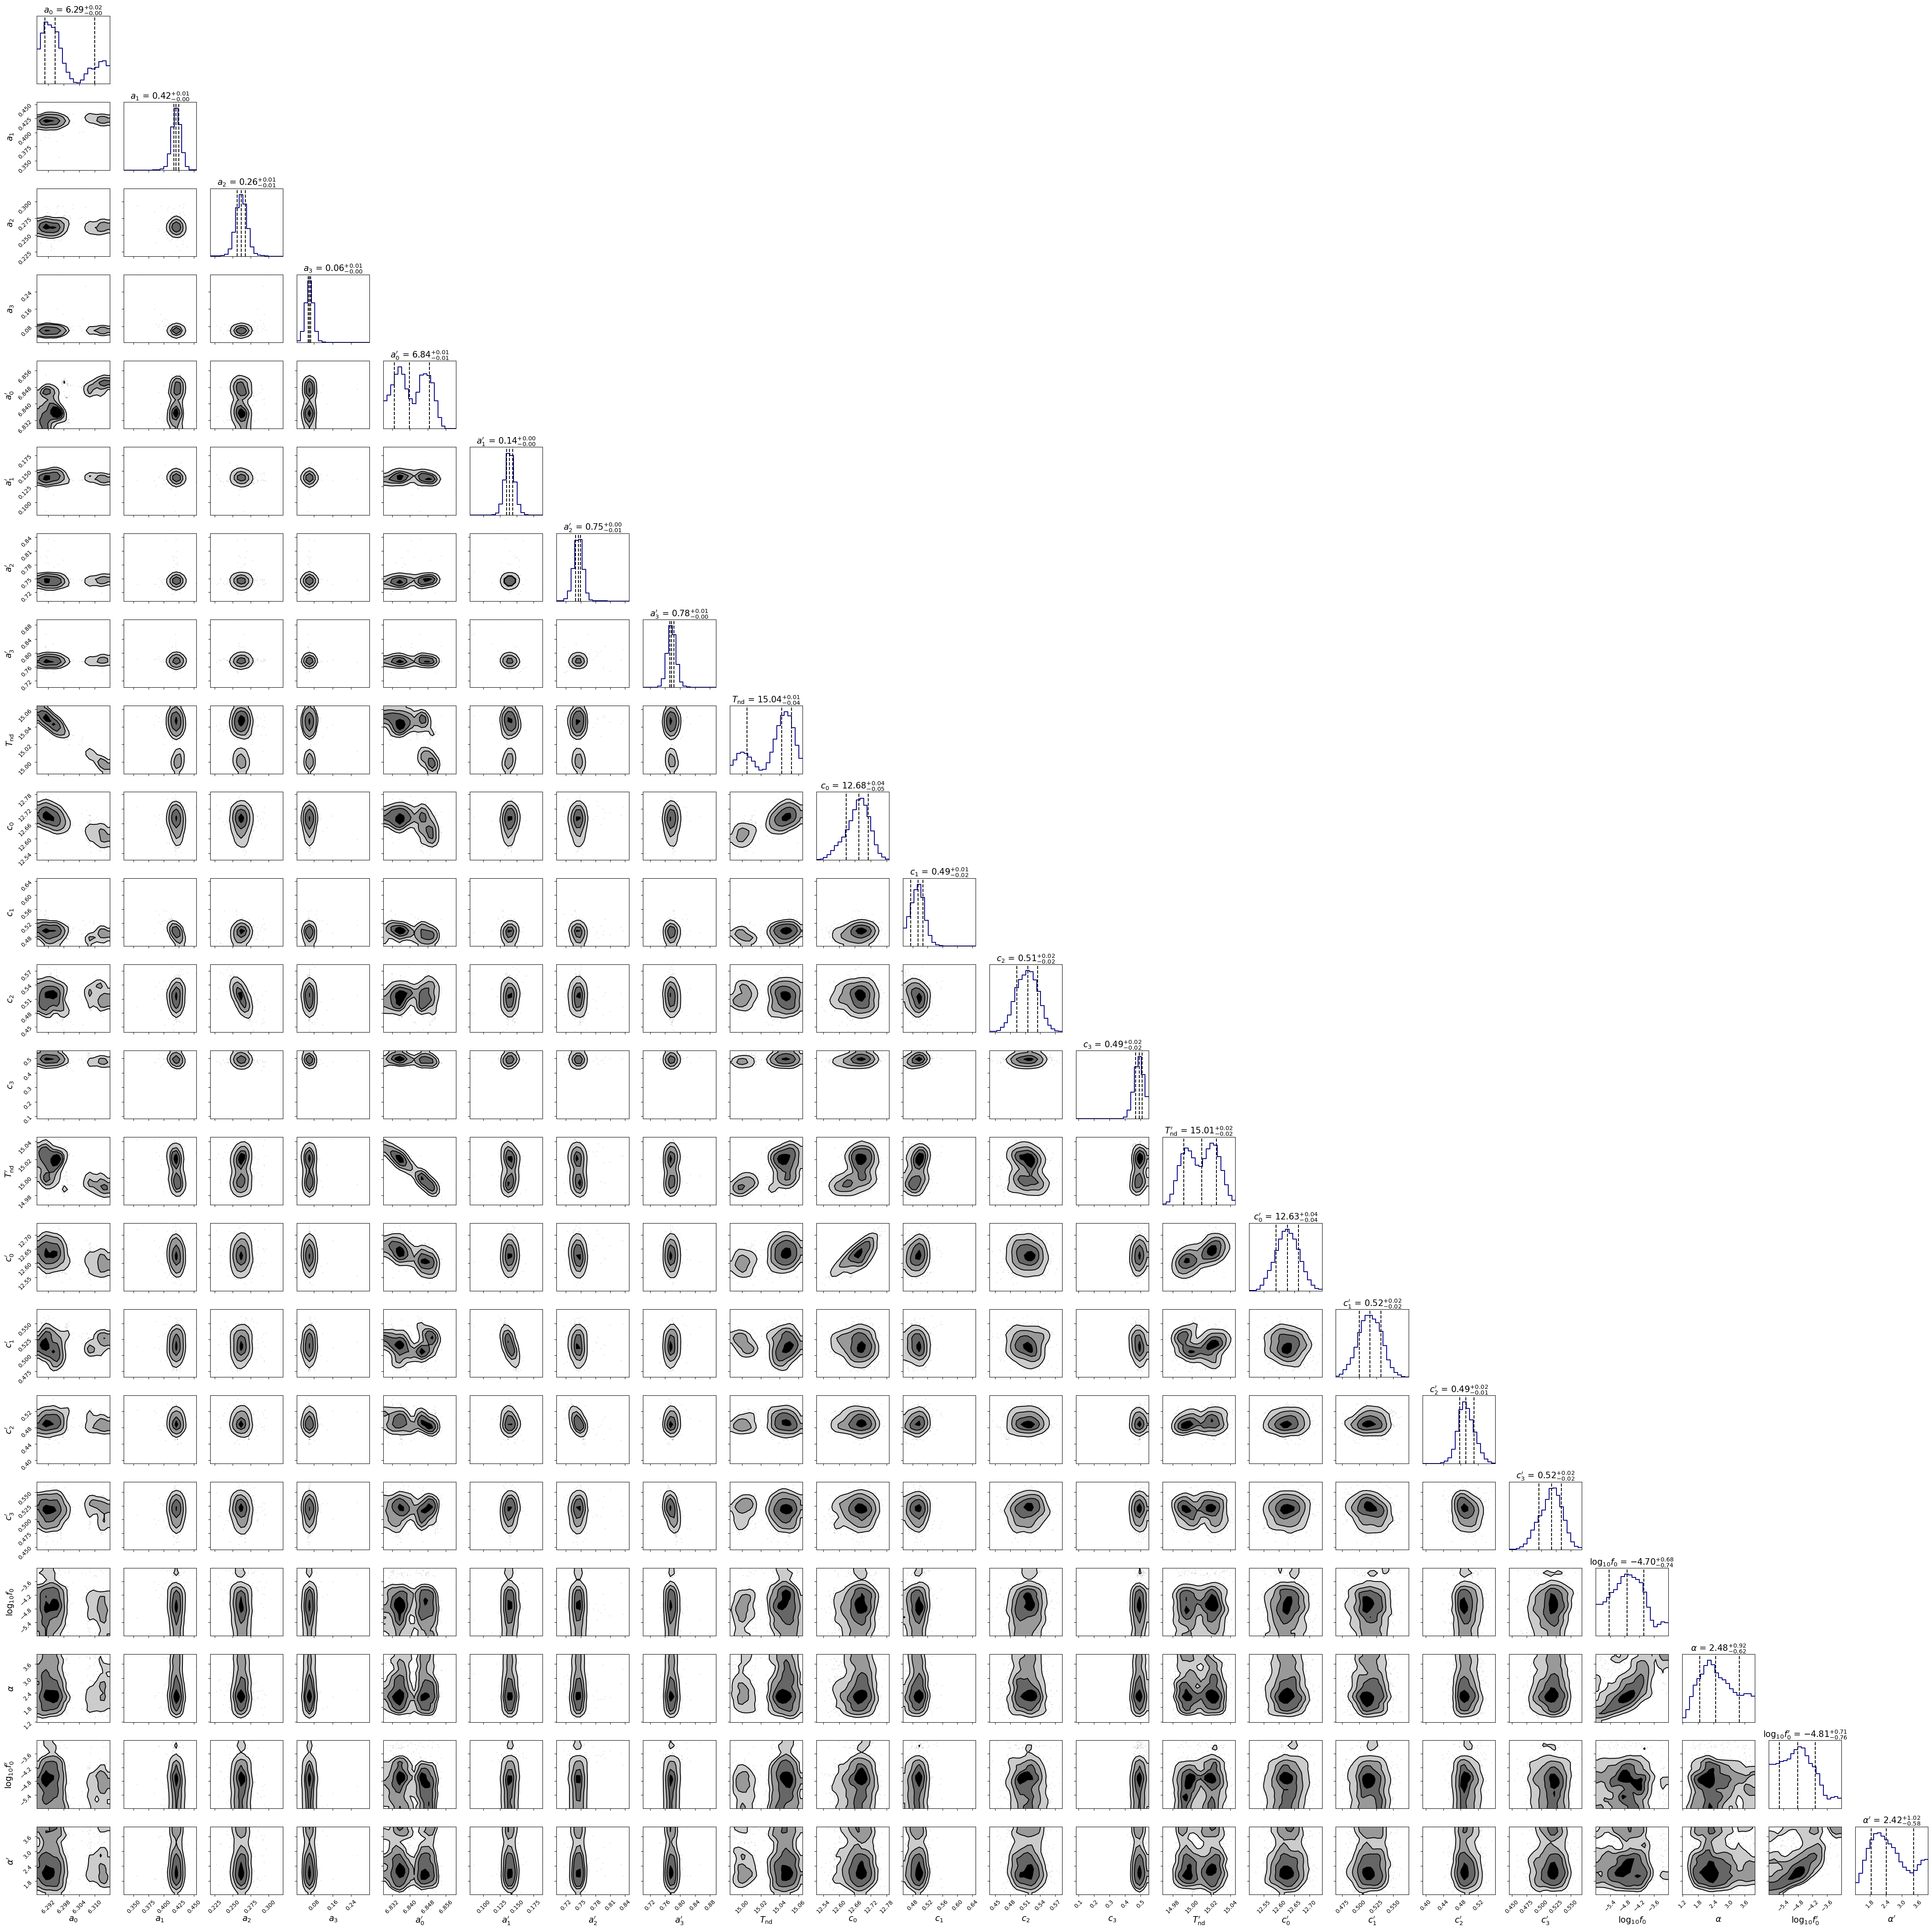

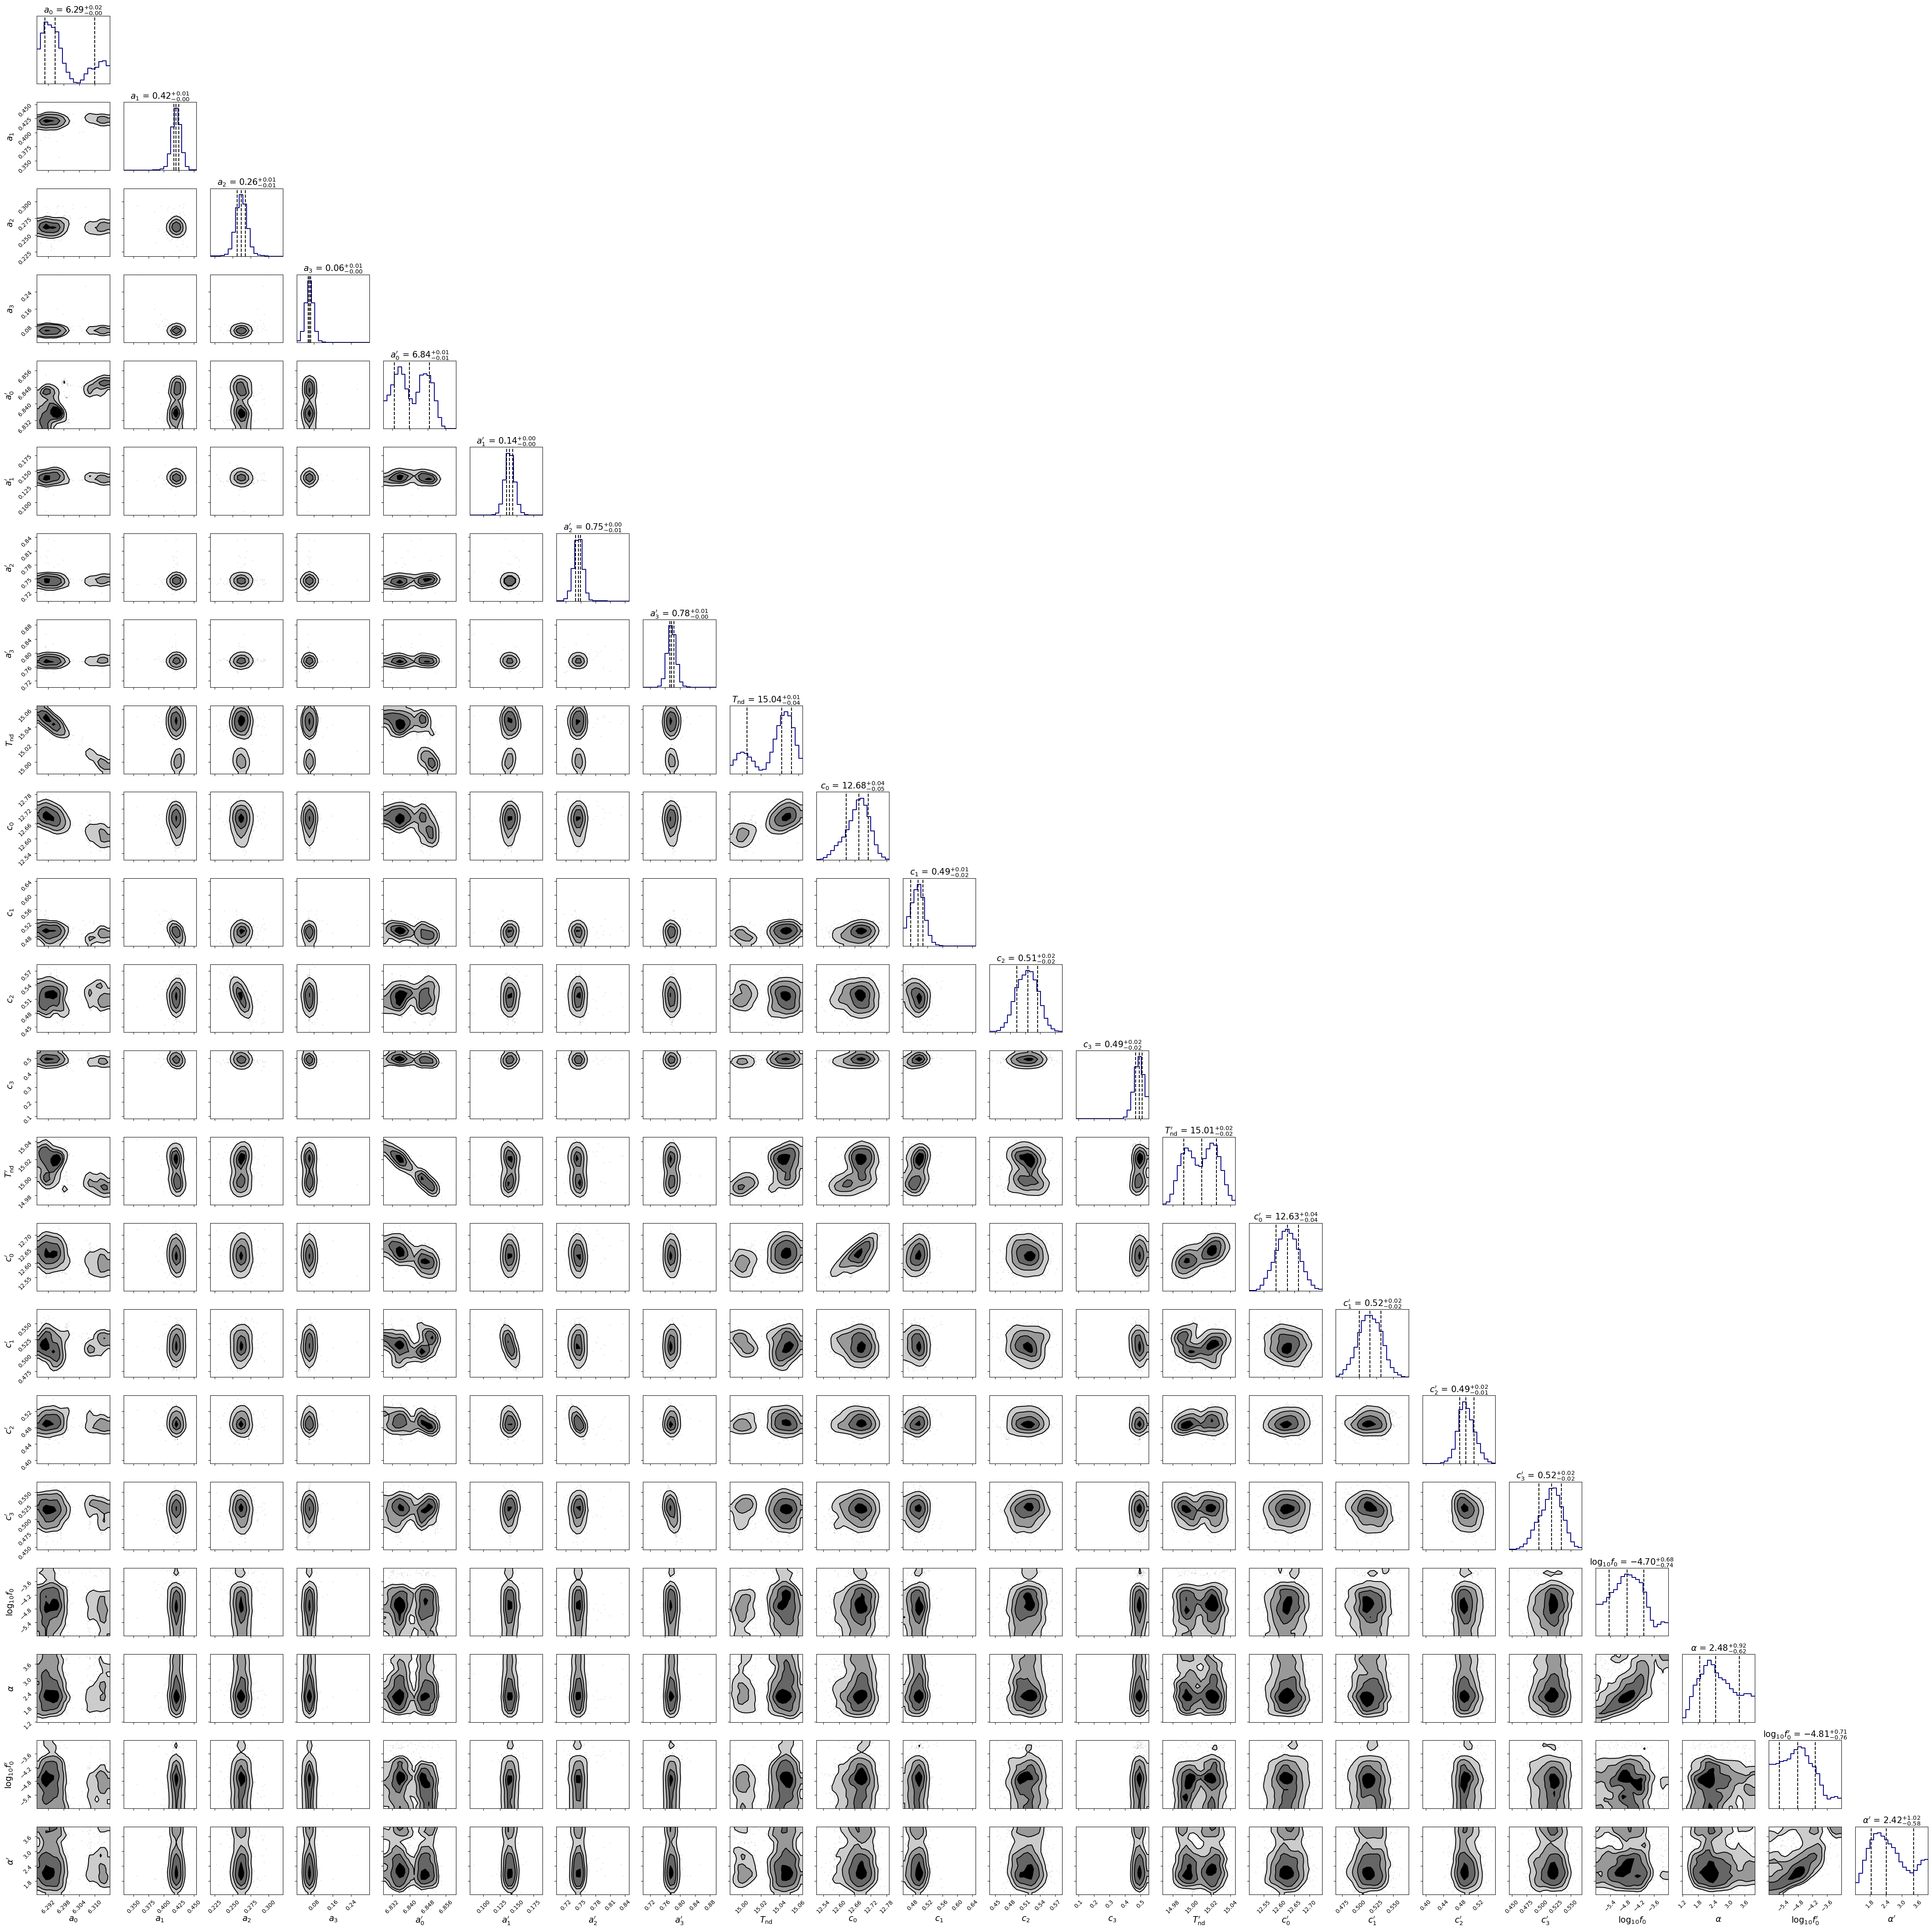

In [17]:
labels_1=[r'$a_0$', r'$a_1$', r'$a_2$',r'$a_3$', r'$T_{\mathrm{nd}}$',
                                r'$c_0$', r'$c_1$', r'$c_2$',r'$c_3$',
                                r'$\text{log}_{10} f_0$',r'$\alpha$']

labels_2=[r'$a_0$', r'$a_1$', r'$a_2$',r'$a_3$', r'$a^{\prime}_0$', r'$a^{\prime}_1$', r'$a^{\prime}_2$',r'$a^{\prime}_3$', 
        r'$T_{\mathrm{nd}}$', r'$c_0$', r'$c_1$', r'$c_2$',r'$c_3$', r'$T^{\prime}_{\mathrm{nd}}$', r'$c^{\prime}_0$', r'$c^{\prime}_1$', r'$c^{\prime}_2$',r'$c^{\prime}_3$', 
        r'$\text{log}_{10} f_0$',r'$\alpha$', r'$\text{log}_{10} f^{\prime}_0$',r'$\alpha^{\prime}$']

plot_corner(GS1_db_others, labels=labels_2, save_path='figures/GS1_db_others_corner.png')

In [20]:
import pandas as pd

def calculate_posterior_stats(samples, percentiles=[16, 50, 84]):
    """
    Calculate posterior statistics for parameter samples.
    
    Parameters:
    -----------
    samples : array-like
        Parameter samples, shape (n_samples, n_parameters)
    percentiles : list
        Percentiles to calculate [lower, median, upper]
        
    Returns:
    --------
    dict with 'mean', 'std', 'median', 'lower', 'upper'
    """
    samples = np.array(samples)
    if samples.ndim == 1:
        samples = samples.reshape(-1, 1)
    
    stats = {}
    stats['mean'] = np.mean(samples, axis=0)
    stats['std'] = np.std(samples, axis=0)
    stats['median'] = np.percentile(samples, percentiles[1], axis=0)
    stats['lower'] = np.percentile(samples, percentiles[0], axis=0)
    stats['upper'] = np.percentile(samples, percentiles[2], axis=0)
    
    return stats

def create_posterior_table():
    """
    Create a comprehensive table of posterior statistics for all scenarios
    """
    
    # Define scenarios and their corresponding data
    scenarios = {
        'GS1': GS1_others,
        'GS5': GS5_others, 
        'GSF5': GSF5_others,
        'GS1_db': GS1_db_others,
        'GS5_db': GS5_db_others,
        'GSF5_db': GSF5_db_others
    }
    
    # Parameter labels for single TOD (11 parameters)
    labels_single = [
        r'$a_0$', r'$a_1$', r'$a_2$', r'$a_3$',  # gain parameters
        r'$T_{\mathrm{nd}}$', r'$c_0$', r'$c_1$', r'$c_2$', r'$c_3$',  # localization parameters
        r'$\log_{10} f_0$', r'$\alpha$'  # noise parameters
    ]
    
    # Parameter labels for double TOD (22 parameters) 
    labels_double = [
        r'$a_0$', r'$a_1$', r'$a_2$', r'$a_3$',  # gain parameters TOD 1
        r'$a^{\prime}_0$', r'$a^{\prime}_1$', r'$a^{\prime}_2$', r'$a^{\prime}_3$',  # gain parameters TOD 2
        r'$T_{\mathrm{nd}}$', r'$c_0$', r'$c_1$', r'$c_2$', r'$c_3$',  # localization parameters TOD 1
        r'$T^{\prime}_{\mathrm{nd}}$', r'$c^{\prime}_0$', r'$c^{\prime}_1$', r'$c^{\prime}_2$', r'$c^{\prime}_3$',  # localization parameters TOD 2
        r'$\log_{10} f_0$', r'$\alpha$',  # noise parameters TOD 1
        r'$\log_{10} f^{\prime}_0$', r'$\alpha^{\prime}$'  # noise parameters TOD 2
    ]
    
    # Create results dictionary
    results = {}
    
    for scenario_name, samples in scenarios.items():
        print(f"Processing {scenario_name}: shape {samples.shape}")
        
        # Calculate statistics
        stats = calculate_posterior_stats(samples)
        
        # Determine parameter labels based on number of parameters
        n_params = samples.shape[1]
        if n_params == 11:
            param_labels = labels_single
        elif n_params == 22:
            param_labels = labels_double
        else:
            param_labels = [f'Param_{i+1}' for i in range(n_params)]
            print(f"Warning: Unexpected number of parameters ({n_params}) for {scenario_name}")
        
        # Store results
        results[scenario_name] = {
            'labels': param_labels,
            'mean': stats['mean'],
            'std': stats['std'],
            'median': stats['median'],
            'lower': stats['lower'],
            'upper': stats['upper'],
            'n_params': n_params
        }
    
    return results

# Calculate posterior statistics
posterior_results = create_posterior_table()

Processing GS1: shape (1000, 11)
Processing GS5: shape (1000, 11)
Processing GSF5: shape (1000, 11)
Processing GS1_db: shape (1000, 22)
Processing GS5_db: shape (1000, 22)
Processing GSF5_db: shape (1000, 22)


In [21]:
def create_formatted_table(results, format_type='latex'):
    """
    Create a formatted table for the posterior statistics
    
    Parameters:
    -----------
    results : dict
        Results from create_posterior_table()
    format_type : str
        'latex', 'markdown', or 'display'
    """
    
    # Separate single TOD and double TOD scenarios
    single_tod_scenarios = ['GS1', 'GS5', 'GSF5']
    double_tod_scenarios = ['GS1_db', 'GS5_db', 'GSF5_db']
    
    def format_interval(mean, lower, upper, decimals=3):
        """Format mean and 68% credible interval"""
        if format_type == 'latex':
            return f"${mean:.{decimals}f}^{{+{upper-mean:.{decimals}f}}}_{{-{mean-lower:.{decimals}f}}}$"
        else:
            return f"{mean:.{decimals}f} (+{upper-mean:.{decimals}f}, -{mean-lower:.{decimals}f})"
    
    # Create tables for single TOD scenarios
    print("=" * 80)
    print("SINGLE TOD SCENARIOS (GS1, GS5, GSF5)")
    print("=" * 80)
    
    # Get parameter labels from first single TOD scenario
    param_labels = results[single_tod_scenarios[0]]['labels']
    
    if format_type == 'display':
        # Create pandas DataFrame for nice display
        table_data = []
        for i, label in enumerate(param_labels):
            row = {'Parameter': label}
            for scenario in single_tod_scenarios:
                mean = results[scenario]['mean'][i]
                lower = results[scenario]['lower'][i]
                upper = results[scenario]['upper'][i]
                row[scenario] = format_interval(mean, lower, upper)
            table_data.append(row)
        
        df_single = pd.DataFrame(table_data)
        print(df_single.to_string(index=False))
        
    elif format_type == 'latex':
        print("\\begin{table}[h]")
        print("\\centering")
        print("\\caption{Posterior means and 68\\% credible intervals for single TOD scenarios}")
        print("\\begin{tabular}{l|ccc}")
        print("\\hline")
        print("Parameter & GS1 & GS5 & GSF5 \\\\")
        print("\\hline")
        
        for i, label in enumerate(param_labels):
            row = label.replace('$', '').replace('\\', '\\\\')
            for scenario in single_tod_scenarios:
                mean = results[scenario]['mean'][i]
                lower = results[scenario]['lower'][i]
                upper = results[scenario]['upper'][i]
                row += f" & {format_interval(mean, lower, upper)}"
            row += " \\\\"
            print(row)
        
        print("\\hline")
        print("\\end{tabular}")
        print("\\end{table}")
    
    print("\n" + "=" * 80)
    print("DOUBLE TOD SCENARIOS (GS1_db, GS5_db, GSF5_db)")
    print("=" * 80)
    
    # Get parameter labels from first double TOD scenario
    param_labels_double = results[double_tod_scenarios[0]]['labels']
    
    if format_type == 'display':
        # Create pandas DataFrame for nice display
        table_data = []
        for i, label in enumerate(param_labels_double):
            row = {'Parameter': label}
            for scenario in double_tod_scenarios:
                mean = results[scenario]['mean'][i]
                lower = results[scenario]['lower'][i]
                upper = results[scenario]['upper'][i]
                row[scenario] = format_interval(mean, lower, upper)
            table_data.append(row)
        
        df_double = pd.DataFrame(table_data)
        print(df_double.to_string(index=False))
        
    elif format_type == 'latex':
        print("\\begin{table}[h]")
        print("\\centering") 
        print("\\caption{Posterior means and 68\\% credible intervals for double TOD scenarios}")
        print("\\begin{tabular}{l|ccc}")
        print("\\hline")
        print("Parameter & GS1\\_db & GS5\\_db & GSF5\\_db \\\\")
        print("\\hline")
        
        for i, label in enumerate(param_labels_double):
            row = label.replace('$', '').replace('\\', '\\\\')
            for scenario in double_tod_scenarios:
                mean = results[scenario]['mean'][i]
                lower = results[scenario]['lower'][i]
                upper = results[scenario]['upper'][i]
                row += f" & {format_interval(mean, lower, upper)}"
            row += " \\\\"
            print(row)
        
        print("\\hline")
        print("\\end{tabular}")
        print("\\end{table}")

# Display the results in a nice format
print("POSTERIOR STATISTICS TABLE")
print("68% credible intervals shown as mean (+upper_error, -lower_error)")
print()

create_formatted_table(posterior_results, format_type='display')

POSTERIOR STATISTICS TABLE
68% credible intervals shown as mean (+upper_error, -lower_error)

SINGLE TOD SCENARIOS (GS1, GS5, GSF5)
        Parameter                     GS1                     GS5                    GSF5
            $a_0$  6.327 (+0.008, -0.013)  6.343 (+0.034, -0.021)  6.304 (+0.003, -0.003)
            $a_1$  0.423 (+0.005, -0.005)  0.424 (+0.005, -0.004)  0.422 (+0.003, -0.003)
            $a_2$  0.265 (+0.005, -0.006)  0.265 (+0.006, -0.007)  0.264 (+0.005, -0.005)
            $a_3$  0.047 (+0.006, -0.007)  0.047 (+0.006, -0.009)  0.048 (+0.005, -0.006)
$T_{\mathrm{nd}}$ 14.967 (+0.033, -0.022) 14.929 (+0.052, -0.078) 15.022 (+0.008, -0.008)
            $c_0$ 12.523 (+0.064, -0.066) 12.456 (+0.092, -0.124) 12.610 (+0.026, -0.027)
            $c_1$  0.557 (+0.072, -0.072)  0.568 (+0.069, -0.074)  0.534 (+0.068, -0.069)
            $c_2$  0.409 (+0.111, -0.110)  0.385 (+0.088, -0.088)  0.374 (+0.085, -0.092)
            $c_3$  0.646 (+0.136, -0.128)  0.604 (+0.075, 

In [22]:
print("\n" + "=" * 80)
print("LaTeX FORMAT FOR PAPER")
print("=" * 80)

# Generate LaTeX tables
create_formatted_table(posterior_results, format_type='latex')

# Also save as CSV for easy import into other tools
def save_results_to_csv(results, filename='posterior_statistics.csv'):
    """Save results to CSV file"""
    
    all_data = []
    
    for scenario_name, data in results.items():
        for i, label in enumerate(data['labels']):
            row = {
                'Scenario': scenario_name,
                'Parameter': label,
                'Mean': data['mean'][i],
                'Std': data['std'][i], 
                'Median': data['median'][i],
                'Lower_68': data['lower'][i],
                'Upper_68': data['upper'][i],
                'N_params': data['n_params']
            }
            all_data.append(row)
    
    df = pd.DataFrame(all_data)
    df.to_csv(filename, index=False)
    print(f"\nResults saved to {filename}")
    return df

# Save to CSV
csv_df = save_results_to_csv(posterior_results)

# Display summary statistics
print("\n" + "=" * 80)
print("SUMMARY STATISTICS")
print("=" * 80)

for scenario_name, data in posterior_results.items():
    print(f"\n{scenario_name} ({data['n_params']} parameters):")
    print(f"  Mean absolute values: {np.mean(np.abs(data['mean'])):.3f}")
    print(f"  Mean uncertainty (68% interval width): {np.mean(data['upper'] - data['lower']):.3f}")
    print(f"  Largest uncertainty: {np.max(data['upper'] - data['lower']):.3f}")
    print(f"  Parameter with largest uncertainty: {data['labels'][np.argmax(data['upper'] - data['lower'])]}")


LaTeX FORMAT FOR PAPER
SINGLE TOD SCENARIOS (GS1, GS5, GSF5)
\begin{table}[h]
\centering
\caption{Posterior means and 68\% credible intervals for single TOD scenarios}
\begin{tabular}{l|ccc}
\hline
Parameter & GS1 & GS5 & GSF5 \\
\hline
a_0 & $6.327^{+0.008}_{-0.013}$ & $6.343^{+0.034}_{-0.021}$ & $6.304^{+0.003}_{-0.003}$ \\
a_1 & $0.423^{+0.005}_{-0.005}$ & $0.424^{+0.005}_{-0.004}$ & $0.422^{+0.003}_{-0.003}$ \\
a_2 & $0.265^{+0.005}_{-0.006}$ & $0.265^{+0.006}_{-0.007}$ & $0.264^{+0.005}_{-0.005}$ \\
a_3 & $0.047^{+0.006}_{-0.007}$ & $0.047^{+0.006}_{-0.009}$ & $0.048^{+0.005}_{-0.006}$ \\
T_{\\mathrm{nd}} & $14.967^{+0.033}_{-0.022}$ & $14.929^{+0.052}_{-0.078}$ & $15.022^{+0.008}_{-0.008}$ \\
c_0 & $12.523^{+0.064}_{-0.066}$ & $12.456^{+0.092}_{-0.124}$ & $12.610^{+0.026}_{-0.027}$ \\
c_1 & $0.557^{+0.072}_{-0.072}$ & $0.568^{+0.069}_{-0.074}$ & $0.534^{+0.068}_{-0.069}$ \\
c_2 & $0.409^{+0.111}_{-0.110}$ & $0.385^{+0.088}_{-0.088}$ & $0.374^{+0.085}_{-0.092}$ \\
c_3 & $0.646^{+

In [31]:
multi_tod_sim.gain_params_rising

array([6.84507868, 0.14156859, 0.7441104 , 0.77863955])